<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/LSTM_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM_Keras

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow import set_random_seed


Using TensorFlow backend.


In [0]:
set_random_seed(42)
np.random.seed(42)
df = pd.read_csv('http://linkededucation.com.br/temp/google_stock_price.csv')


In [3]:
df['d1']=0.0
df['d2']=0.0
df['d3']=0.0
df['d4']=0.0
df['target']=0.0

df.head()

,Stock_Price,d1,d2,d3,d4,target
0,50.12,0.0,0.0,0.0,0.0,0.0
1,54.10,0.0,0.0,0.0,0.0,0.0
2,54.65,0.0,0.0,0.0,0.0,0.0
3,52.38,0.0,0.0,0.0,0.0,0.0
4,52.95,0.0,0.0,0.0,0.0,0.0


In [4]:
for i in range(1000):
  df.iloc[i,1]=df.iloc[i+1,0]
  df.iloc[i,2]=df.iloc[i+2,0]
  df.iloc[i,3]=df.iloc[i+3,0]
  df.iloc[i,4]=df.iloc[i+4,0]
  df.iloc[i,5]=df.iloc[i+5,0]
ndf=df[:1000].copy()
y=np.array(ndf['target'])
ndf=ndf.drop(columns='target',axis=1)
X=np.array(ndf)
print(X.shape)
print(X[:3])
X=X[:,:,np.newaxis]
print(X.shape)
X[:3]

(1000, 5)
[[50.12 54.1  54.65 52.38 52.95]
 [54.1  54.65 52.38 52.95 53.9 ]
 [54.65 52.38 52.95 53.9  53.02]]
(1000, 5, 1)


array([[[50.12],
        [54.1 ],
        [54.65],
        [52.38],
        [52.95]],

       [[54.1 ],
        [54.65],
        [52.38],
        [52.95],
        [53.9 ]],

       [[54.65],
        [52.38],
        [52.95],
        [53.9 ],
        [53.02]]])

In [13]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(5, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
1000/1000 [==============================] - 1s 975us/step - loss: 45322.3076
Epoch 2/200
1000/1000 [==============================] - 0s 157us/step - loss: 32624.8231
Epoch 3/200
1000/1000 [==============================] - 0s 182us/step - loss: 4381.1643
Epoch 4/200
1000/1000 [==============================] - 0s 151us/step - loss: 117.0508
Epoch 5/200
1000/1000 [==============================] - 0s 177us/step - loss: 84.2343
Epoch 6/200
1000/1000 [==============================] - 0s 158us/step - loss: 84.9765
Epoch 7/200
1000/1000 [==============================] - 0s 154us/step - loss: 83.2246
Epoch 8/200
1000/1000 [==============================] - 0s 152us/step - loss: 83.7197
Epoch 9/200
1000/1000 [==============================] - 0s 161us/step - loss: 93.9971
Epoch 10/200
1000/1000 [==============================] - 0s 182us/step - loss: 84.7076
Epoch 11/200
1000/1000 [==============================] - 0s 152us/step - loss: 81.9253
Epoch 12/200
1000/1000 [========

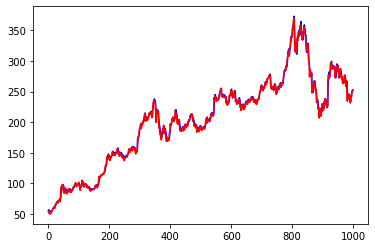

(98.55, array([100.69722], dtype=float32))

In [14]:
ye = model.predict(X)
import matplotlib.pyplot as plt
plt.plot(ye, color='blue')
plt.plot(y, color='red')
plt.show()

y[100], ye[100] # estimate nth day.

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
